In [1]:
# This is a Python 3 environment

# Base level imports for data science work

import numpy as np 
import pandas as pd
import string, re, unicodedata
# import os
# from os import path

# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Libs
import nltk
nltk.download('stopwords')
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Additional Libs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

# Deep Learning Libs
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

print('import completed')

[nltk_data] Downloading package stopwords to C:\Users\GAN
[nltk_data]     BINGZHENG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


import completed


In [2]:
data = pd.read_csv('resized_v2.csv', index_col=0)
print('data frame loaded')

C:\Users\GAN BINGZHENG\anaconda3\envs\keras_env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


data frame loaded


In [3]:
data = data[['title', 'content', 'type']]
data['text'] = data['title'] + " " + data['content']
data.dropna(inplace=True)
del data['title']
del data['content']

data.isnull().values.sum()

0

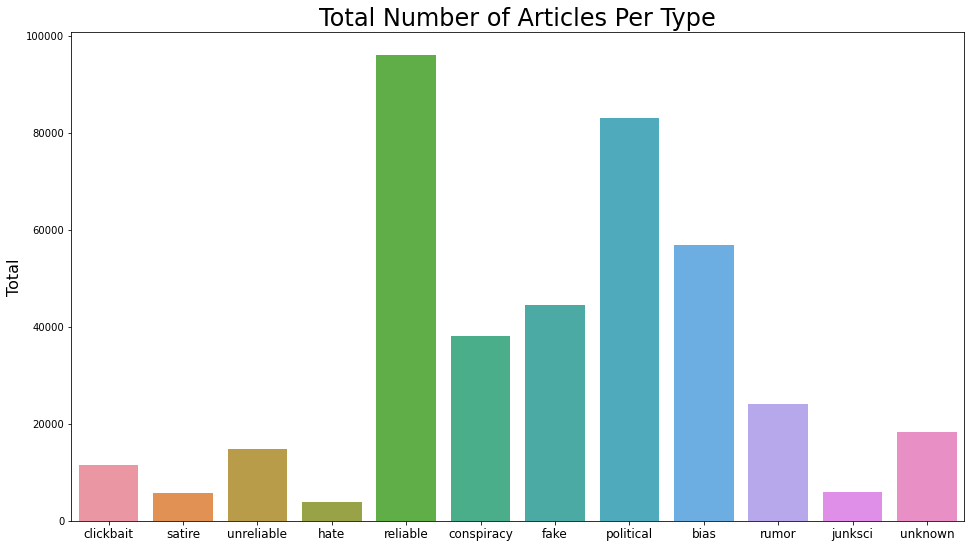

In [4]:
# total number of articles per type
plt.figure(figsize=(16,9))
sns.countplot(x='type', data=data)
plt.title('Total Number of Articles Per Type', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.show()

In [5]:
# chosen type: reliable, fake, clickbait
data_filter = data.loc[(data.type == 'reliable') | (data.type == 'fake') | (data.type == 'clickbait'), :]
data_filter.type.value_counts()

reliable     96024
fake         44459
clickbait    11572
Name: type, dtype: int64

In [22]:
data_reliable = data.loc[data.type == 'reliable', :]
data_reliable = data_reliable.sample(5000, random_state=1)
data_fake = data.loc[data.type == 'fake', :]
data_fake = data_fake.sample(5000, random_state=1)
data_clickbait = data.loc[data.type == 'clickbait', :]
data_clickbait = data_clickbait.sample(5000, random_state=1)

data_final = pd.concat([data_reliable, data_fake, data_clickbait])
data_final.type.value_counts()

reliable     5000
fake         5000
clickbait    5000
Name: type, dtype: int64

In [23]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
print('completed')

completed


In [24]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Final function to clean the text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column
data_cleaned = data_final
data_cleaned = data_cleaned.copy()
data_cleaned['text'] = data_filter['text'].apply(clean_text)
print('cleaning completed')

cleaning completed


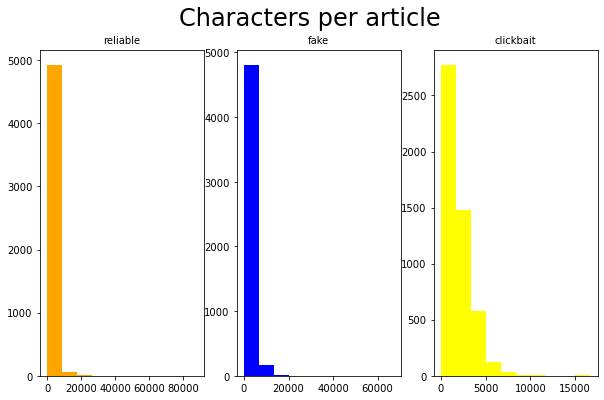

In [25]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,6))
text_len=data_cleaned[data_cleaned['type']=='reliable']['text'].str.len()
ax1.hist(text_len,color='orange')
ax1.set_title('reliable', fontsize=10)
text_len=data_cleaned[data_cleaned['type']=='fake']['text'].str.len()
ax2.hist(text_len,color='blue')
ax2.set_title('fake', fontsize=10)
text_len=data_cleaned[data_cleaned['type']=='clickbait']['text'].str.len()
ax3.hist(text_len,color='yellow')
ax3.set_title('clickbait', fontsize=10)
fig.suptitle('Characters per article', fontsize=24)

plt.show()

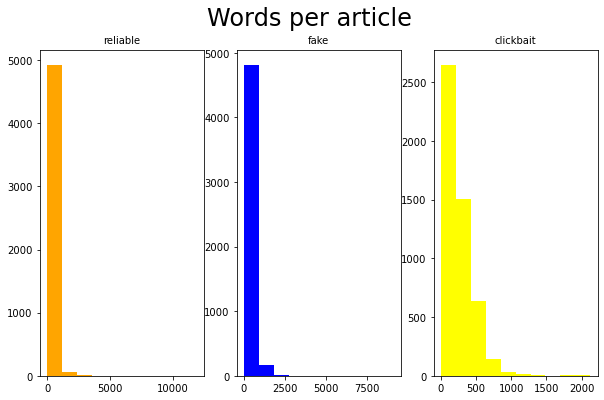

In [26]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,6))
text_len=data_cleaned[data_cleaned['type']=='reliable']['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='orange')
ax1.set_title('reliable', fontsize=10)
text_len=data_cleaned[data_cleaned['type']=='fake']['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='blue')
ax2.set_title('fake', fontsize=10)
text_len=data_cleaned[data_cleaned['type']=='clickbait']['text'].str.split().map(lambda x: len(x))
ax3.hist(text_len,color='yellow')
ax3.set_title('clickbait', fontsize=10)
fig.suptitle('Words per article', fontsize=24)

plt.show()

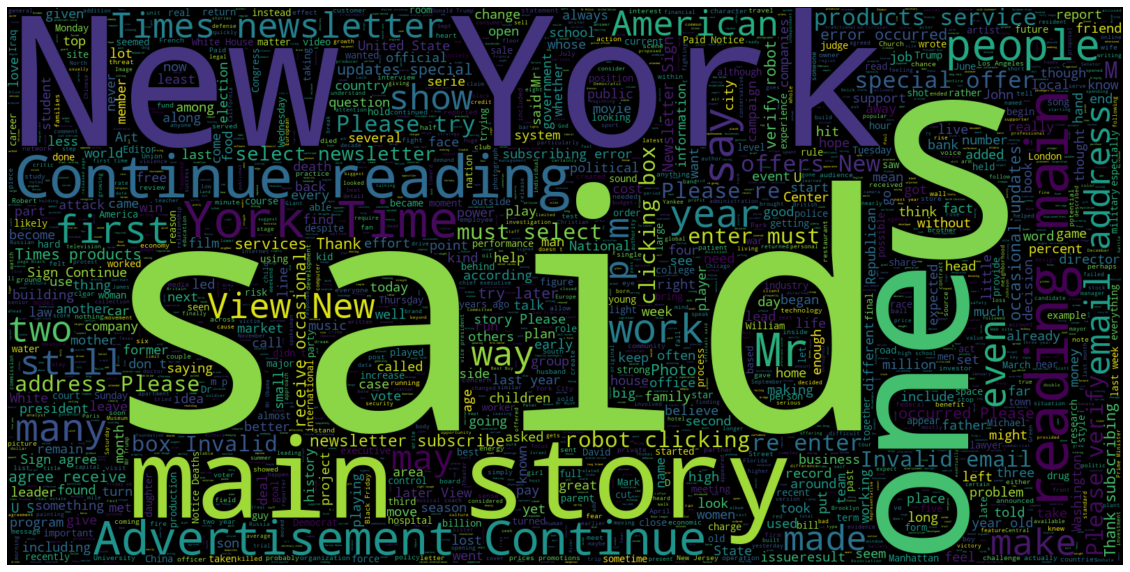

In [27]:
plt.figure(figsize = (20,20)) # Text from the reliable news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data_cleaned[data_cleaned.type == 'reliable'].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show()

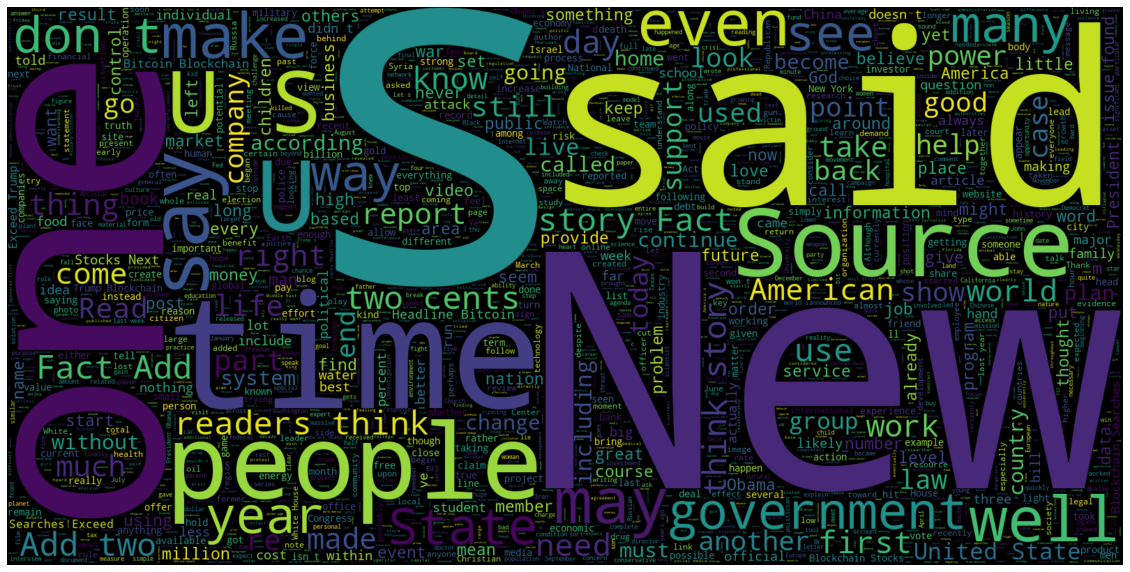

In [28]:
plt.figure(figsize = (20,20)) # Text from the fake news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data_cleaned[data_cleaned.type == 'fake'].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show()

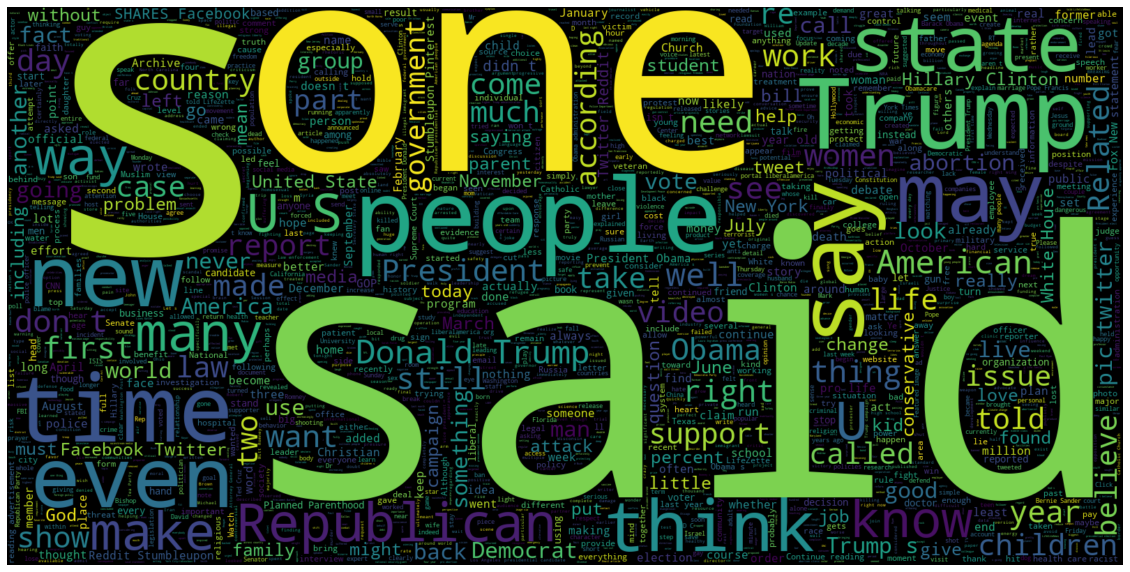

In [29]:
plt.figure(figsize = (20,20)) # Text from the clickbait news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data_cleaned[data_cleaned.type == 'clickbait'].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [30]:
# First up, we need to Train Test Split the data

X = data_cleaned.text
y = data_cleaned.type

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y, random_state=19)

# Create of Count Vectorize object
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transform the train dataset
cv_train=cv.fit_transform(X_train)

# Transform the test dataset
cv_test=cv.transform(X_test)

print('Bag of words Train:',cv_train.shape)
print('Bag of words Test:',cv_test.shape)

Bag of words Train: (12000, 4664525)
Bag of words Test: (3000, 4664525)


In [31]:
# Create the TF-IDF object
tfidf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

# Transform the train dataset
tfidf_train=tfidf.fit_transform(X_train)

# Transform the test dataset
tfidf_test=tfidf.transform(X_test)

print('TF-IDF Train:',tfidf_train.shape)
print('TF-IDF Test:',tfidf_test.shape)

TF-IDF Train: (12000, 4664525)
TF-IDF Test: (3000, 4664525)


In [32]:
# Create our model object
mnb = MultinomialNB()

# Fit the model to the Bag of words CountVectorizor
mnb_cv = mnb.fit(cv_train, y_train)

# Fit the model to the TF-IDF features
mnb_tfidf = mnb.fit(tfidf_train, y_train)

In [33]:
# Predicting the model for bag of words
mnb_cv_predict=mnb.predict(cv_test)

# Predicting the model for tf-idf features
mnb_tfidf_predict=mnb.predict(tfidf_test)

In [34]:
# Check the accuracy score for bag of words
mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
print("Naive Bayes Bag of words accuracy score:", mnb_cv_score)

# Check the accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("Naive Bayes TF-IDF accuracy score:", mnb_tfidf_score)

Naive Bayes Bag of words accuracy score: 0.695
Naive Bayes TF-IDF accuracy score: 0.695


In [35]:
mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['reliable', 'fake', 'clickbait'])
print(mnb_cv_report)
mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['reliable', 'fake', 'clickbait'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    reliable       0.65      0.77      0.70      1000
        fake       0.68      0.60      0.64      1000
   clickbait       0.77      0.72      0.75      1000

    accuracy                           0.69      3000
   macro avg       0.70      0.69      0.69      3000
weighted avg       0.70      0.69      0.69      3000

              precision    recall  f1-score   support

    reliable       0.65      0.77      0.70      1000
        fake       0.68      0.60      0.64      1000
   clickbait       0.77      0.72      0.75      1000

    accuracy                           0.69      3000
   macro avg       0.70      0.69      0.69      3000
weighted avg       0.70      0.69      0.69      3000



In [36]:
data_cleaned.sample(5)

,type,text
338988,reliable,Qatar give $1.25 billion aid Tunisia: Emir TUN...
282485,fake,Petition ICC UN Charge Netanyahu Israel War Cr...
94771,clickbait,LifeZette ‹ Log Log WordPress.com save time sp...
281714,fake,US Police Target Shooting Black Suspects – Med...
32772,fake,"Fall Feasts: Yom Kippur, Trumpets, Tabernacles..."


In [37]:
data_cleaned.to_csv('cleaned_15000_records.csv')